# T2M Plotter

In [3]:
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import urllib
import pandas as pd
import numpy as np
import xarray as xr
import datetime
import matplotlib.animation as animation
import matplotlib
from IPython.display import HTML
%matplotlib inline

In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\philipc2\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [4]:
# Read data 
path = r"E:\datasets\ERA5_mon_1979-2019_T2m.nc"
data = xr.open_dataset(path)
data.head()

<xarray.Dataset>
Dimensions:    (latitude: 5, longitude: 5, time: 5)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 1.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 89.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 1979-05-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-08 14:51:28 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [49]:
# Create a dictionary of regions
regionDict = {
    "World" : [-180, 180, -90, 90],
    "North America" : [-140, -60, 20, 45],
    "South America" : [-85, -30, -60, 20],
    "Central America" : [-120, -60, 0, 30],
    "Europe" : [-21, 60, 30, 70],
    
}

In [5]:
# Create a dictionary for time
keys = np.arange('1979-01-01', '2020-01-01', dtype='datetime64[M]')

newKeys = []
for key in keys:
    newKeys.append(str(key))
    

values = np.arange(0, 492)
timeDict = dict(zip(newKeys, values))

In [52]:
# Function that displays the T2M at a given location on a given data
# Inputs

def t2mPlot(date, location):
    
    if date not in timeDict:
        print("Invlaid Date / Not in dataset")
        return;
        
    if location not in regionDict:
        print("Invalid Region")
        return;
    
    index = timeDict[date]
    fig = plt.figure(figsize = (12,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cartopy.feature.BORDERS, edgecolor='black')
    ax.add_feature(cartopy.feature.COASTLINE, edgecolor='black')
    ax.add_feature(cartopy.feature.STATES, edgecolor='black')
    ax.add_feature(cartopy.feature.LAKES, edgecolor='black', alpha=0.01)
    ax.set_extent(regionDict[location])
    m = ax.contourf(data.t2m.isel(time=index).longitude, data.t2m.isel(time=index).latitude, 
                    data.t2m.isel(time=index), 20, cmap = 'coolwarm')
    plt.colorbar(m)
    ax.set_title("Temperature at 2 meters above sea level on {}".format(date))
    
    return



# Execution Instructions
1. Call the t2m(string date, string region) function
2. Date must be in the format 'yyyy-mm'
3. Region must be from the list below


* World
* North America
* South America
* Central America
* Europe
* More to be added soon

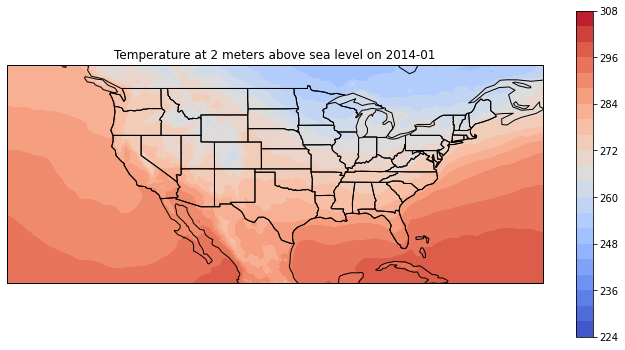

In [55]:
t2mPlot("2014-01", "World")